In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st
from scipy.stats import norm

In [2]:
#Z-SCORE 

In [3]:
def z_score(sample_size,sample_mean,pop_mean,pop_std):
    numerator   =sample_mean-pop_mean
    denominator =pop_std/sample_size**0.5
    return numerator/denominator

# Understanding the Hypothesis Testing

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

### Known Variance of Population

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? (Given that the population std is 50) </b>


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [16]:
#2.computing Sample mean
s=[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
st.mean(s)
#or
sum(s)/len(s)

465.3

In [17]:
#4.
# Two Tail- Calculating z-critical value
confidence_level=0.95
alpha=1-confidence_level
z_critical=norm.ppf(1-alpha/2)
print(z_critical)

1.959963984540054


In [21]:
#3.
#defining sample and population parameters fro Z-SCORE

sample_size=10
sample_mean=465.3
pop_mean=500
pop_std=50

# calculating Z-SCORE

z=z_score(sample_size,sample_mean,pop_mean,pop_std)
print(z)


-2.1946206961568544


Text(465.3, 0.0007, 'x_bar')

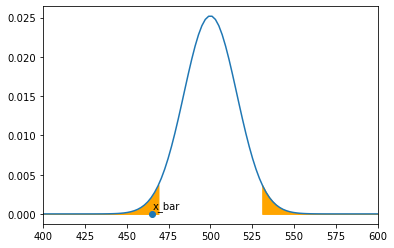

In [26]:
# plotting the sampling distributions with rejection regions

# Defining the x minimum and x maximum for the plot
x_min=400
x_max=600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max,100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis


In [27]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [37]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.028190817687629988
Reject Null Hypothesis


<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? (Given that the population std is 0.5)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 10 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if ? $$

Step - 5.2: Compute p-value



## step-1
### Alternate Hypothesis(h0):  average rating given by the users is greater than 4 on a scale of 1 to 5. 
### Null Hypothesis     (h1):   average rating given by the users is not greater than 4 on a scale of 1 to 5.      

In [43]:
#step-2
#collecting sample size

s=[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]

# calculating sample mean
st.mean(s)
#or
sum(s)/len(s)


4.25

In [45]:
#3. z_score

In [47]:
# Defining the sample and population parameters
sample_size=20
sample_mean=4.25
pop_mean=4
pop_std=0.5

In [48]:
# calculating z-score
z=z_score(sample_size,sample_mean,pop_mean,pop_std)
print(z)

2.23606797749979


In [51]:
# 4. deciding  alpha

confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [52]:
#5.one tail test - calculating z_critical
z_critical=norm.ppf(1-alpha)
print(z_critical)


1.6448536269514722


Text(4.25, 0.1, 'x_bar')

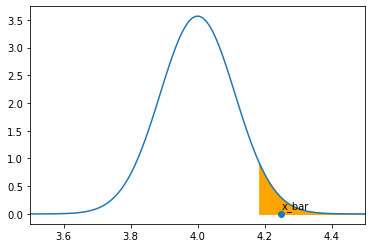

In [54]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
z_critical_right = pop_mean + (z_critical * std)


# Shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [55]:
# Conclusion using z test

if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [56]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0126736593387341
Reject Null Hypothesis


<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 10 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

## step-1
##### Alternate Hypothesis:on average the SUV's mileage is at least 15 km/litre
##### Null Hypothesis         :on average the SUV's mileage is not greater than  or                                                   equal  to 15 km/litre 

# Step-2

In [59]:
#collecting sample size
s=[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
st.mean(s)

15.099

In [60]:
# step-3

#calculating z_score

sample_size=20
sample_mean=15.1
pop_mean=15
pop_std=1

z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

0.4472135954999564


In [61]:
# step-4
#Deciding alpha

confidence_level=0.95
alpha=1-confidence_level
alpha


0.050000000000000044

In [62]:
#step-5
#One tail Test calculating z_critical
z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


Text(15.1, 0.1, 'x_bar')

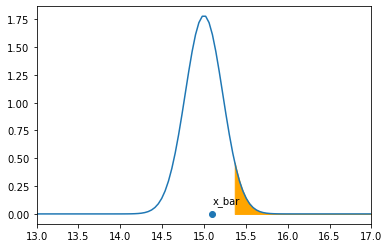

In [63]:
x_min = 13
x_max = 17

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_right = pop_mean + (z_critical * std)

x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [64]:
if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [65]:
p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.32736042300928914
Fail to reject Null Hypothesis


<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10 ms)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ ? $$
Null Hypothesis (Status Quo): $$ H_0: \ ? $$

Step - 2:  
* Collect a sample of size n = 100
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

# step-1
Alternate Hypothesis:on average it takes less than 100 ms to predict                        for any future datapoint

Null Hypothesis     :on average it takes more than 100 ms to predict for any future datapoint

In [67]:
# step-2
sample_mean=97.5


In [69]:
#step-3  calculate z-score
sample_size=100
sample_mean=97.5
pop_mean=100
pop_std=10

z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-2.5


In [73]:
# step-4 Deciding alpha
confidence_level=0.99
alpha=1-confidence_level
alpha

0.010000000000000009

In [74]:
# step-5 tail -test
# one tail test

z_critical = norm.ppf(1 - alpha)

print(z_critical)

2.3263478740408408


Text(97.5, 0.02, 'x_bar')

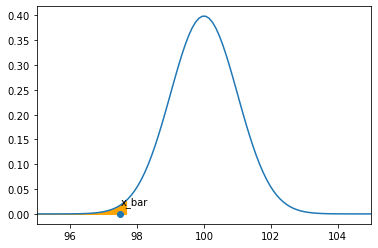

In [75]:
x_min = 95
x_max = 105

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_left = pop_mean + (-z_critical * std)

x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [76]:
if(z < -z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [77]:
p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.006209665325776159
Reject Null Hypothesis
